In [11]:
from standardInclude import *

In [12]:
t = r.TChain("t0Analyzer/t0Tree")
t.Add("./data/gm2nearline_hists_run33149*")

16

In [13]:
t2 = r.TChain("t0Analyzer/t0Tree")
t2.Add("./data/gm2nearline_hists_run33148*")

23

In [14]:
def plotT0SingleBunch(t, ax, bunch, rangeAroundMaximum = 300, labeli=""):
        nsamples = t.Draw("sampleNums:tracetubeA","pulseIndex == "+str(bunch),"goff")
        samples = list(t.sampleNums[:-1])
        tubeA = list(t.tracetubeA)
        maxIndex = tubeA.index(max(tubeA))
        xlims = [samples[maxIndex - rangeAroundMaximum], samples[maxIndex + rangeAroundMaximum]]
        ding = ax.plot(samples, tubeA,label=labeli)
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_title("Bunch "+str(bunch))
        return (samples, tubeA)

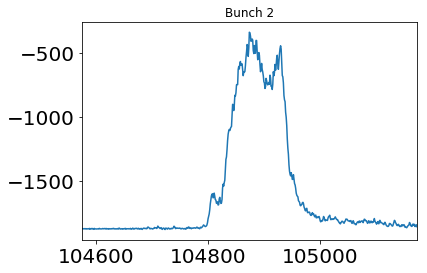

In [15]:
fig, ax = plt.subplots()
ding = plotT0SingleBunch(t, ax, 2)
plt.show()

In [16]:
def plotT0Traces(t, ax, combineTraces = False, rangeAroundMaximum = 500,labeli="",normalize=False, verbosity=0):
    if combineTraces:
        nsamples = t.Draw("sampleNums:tracetubeA","","goff")
        samples = list(t.sampleNums[:-1])
        tubeA = list(t.tracetubeA)
        maxIndex = tubeA.index(max(tubeA))
        xlims = [samples[maxIndex - rangeAroundMaximum], samples[maxIndex + rangeAroundMaximum]]
        ding = ax.plot(samples, tubeA,label=labeli)
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_title("All Bunches")
        return (samples, tubeA)
    else:
        allSamples = []
        allTubeA = []
        for bunch in range(16):
            if(verbosity > 0):
                print("Starting bunch", bunch)
            nsamples = t.Draw("sampleNums:tracetubeA","pulseIndex == "+str(bunch),"goff")
            samples = []
            tubeA = []
            for i in range(nsamples):
                samples.append(t.GetV1()[i])
                tubeA.append(t.GetV2()[i])
            #tubeAHist = []
            #for i, x in enumerate(tubeA):
            #    tubeAHist.append([x for i in range(x)])
            #samples = list(t.sampleNums[:-1])
            #tubeA = list(t.tracetubeA)
            
            
            #take average of this bunch
            avgSamples = []
            avgTubeA = []
            for i, x in enumerate(samples):
                if(x not in avgSamples):
                    #print(i, x)
                    indices = [j for j, y in enumerate(samples) if y == x]
                    ding = [tubeA[j] for j in indices]
                    avgSamples.append(x)
                    avgTubeA.append(np.mean(ding))
            
            allSamples.append(avgSamples)
            allTubeA.append(avgTubeA)
            
            if(len(ax) == 16):
                #ax[bunch].plot(samples, tubeA)
                ax[bunch].plot(avgSamples, avgTubeA,label=labeli)
                ax[bunch].set_title("Bunch "+str(bunch))
                maxIndex = tubeA.index(max(tubeA))
                xlims = [samples[maxIndex - rangeAroundMaximum], samples[maxIndex + rangeAroundMaximum]]
                ax[bunch].set_xlim(xlims[0], xlims[1])
            else:
                print("Error: axis length is not 16. Not drawing")
        return (allSamples, allTubeA)

In [17]:
def plotT0TracesBetter(t, ax, combineTraces = False, rangeAroundMaximum = 500,labeli="",normalize=False, verbosity=0):
    if combineTraces:
        nsamples = t.Draw("sampleNums:tracetubeA","","goff")
        samples = list(t.sampleNums[:-1])
        tubeA = list(t.tracetubeA)
        maxIndex = tubeA.index(max(tubeA))
        xlims = [samples[maxIndex - rangeAroundMaximum], samples[maxIndex + rangeAroundMaximum]]
        ding = ax.plot(samples, tubeA,label=labeli)
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_title("All Bunches")
        return (samples, tubeA)
    else:
        allSamples = [[] for i in range(15)]
        allTubeA = [[] for i in range(15)]
        if(verbosity > 0):
            print("starting draw...")
        nsamples = t.Draw("sampleNums:tracetubeA:pulseIndex","pulseIndex == "+str(bunch),"goff")
        if(verbosity > 0):
            print("drawn! plotting...")
        for i in range(nsamples):
            allSamples[t.GetV3()[i]].append(t.GetV1()[i])
            allTubeA[t.GetV3()[i]].append(t.GetV2()[i])
        for bunch in range(16):
            if(verbosity > 0):
                print("Starting bunch", bunch)
            
            samples = allSamples[bunch]
            tubeA = allSamples[bunch]
            
            #take average of this bunch
            avgSamples = []
            avgTubeA = []
            for i, x in enumerate(samples):
                if(x not in avgSamples):
                    #print(i, x)
                    indices = [j for j, y in enumerate(samples) if y == x]
                    ding = [tubeA[j] for j in indices]
                    avgSamples.append(x)
                    avgTubeA.append(np.mean(ding))
            
            allSamples.append(avgSamples)
            allTubeA.append(avgTubeA)
            
            if(len(ax) == 16):
                #ax[bunch].plot(samples, tubeA)
                ax[bunch].plot(avgSamples, avgTubeA,label=labeli)
                ax[bunch].set_title("Bunch "+str(bunch))
                maxIndex = tubeA.index(max(tubeA))
                xlims = [samples[maxIndex - rangeAroundMaximum], samples[maxIndex + rangeAroundMaximum]]
                ax[bunch].set_xlim(xlims[0], xlims[1])
            else:
                print("Error: axis length is not 16. Not drawing")
        return (allSamples, allTubeA)

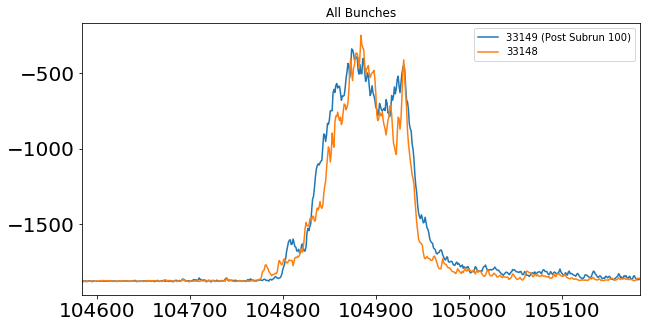

In [18]:
fig, ax = plt.subplots(figsize=(10,5),sharex=True, sharey=True)
plotT0Traces(t, ax, True,300,"33149 (Post Subrun 100)")
plotT0Traces(t2, ax, True,300,"33148")
plt.legend()
plt.show()

In [ ]:
fig, axs = plt.subplots(4,4,figsize=(15,10),sharex=True, sharey=True)
ax = flatten2dArray(axs)
ding = plotT0Traces(t, ax, False, 300,False, 1)
plt.show()

In [ ]:
fig, axs = plt.subplots(4,4,figsize=(15,10),sharex=True, sharey=True)
ax = flatten2dArray(axs)
dong = plotT0Traces(t2, ax, False, 300,False, 1)
plt.show()

In [ ]:
#fig,ax = plt.subplots(figsize=(15,5))
fig, axs = plt.subplots(4,4,figsize=(15,10),sharex=True, sharey=True)
ax = flatten2dArray(axs)
for i in range(15):
    ax[i].plot(ding[0][i],ding[1][i],label="Run 33149 Bunch "+str(i))
    ax[i].plot(dong[0][i],dong[1][i],label="Run 33148 Bunch "+str(i))
#plt.xlim(6500,7500)
plt.xlim(104700,105200)
plt.legend(ncol=3)
plt.show()